In [60]:
## Initialization
#pakages
ENV["JULIA_PKG_SERVER"] = "https://jp.pkg.julialang.org"
using Pkg
using CSV
using DataFrames
using DifferentialEquations
using Interpolations
using Plots




#             1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
stoi_mat = [  1 -1  1  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #HCO3
              0 -1  1  1  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #CPSase
              0  1 -1 -1  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #HCO3-CPSase
              0  0  0  1 -1 -1  1  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #CP
              0  0  0  0  0 -1  1  1  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #ATCase
              0  0  0  0  0  1 -1 -1  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #CP-ATCase
              0  0  0  0  0  0  0  1 -1  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #CA
              0  0  0  0  0  0  0  0 -1  1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #DHOase
              0  0  0  0  0  0  0  0  1 -1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #CA-DHOase
              0  0  0  0  0  0  0  0  0  0   1  -1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #DHO
              0  0  0  0  0  0  0  0  0  0   0  -1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #DHODH
              0  0  0  0  0  0  0  0  0  0   0   1  -1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #DHO-DHODH
              0  0  0  0  0  0  0  0  0  0   0   0   0   1  -1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #OA
              0  0  0  0  0  0  0  0  0  0   0   0   0   0  -1   1   1  -1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #UMPSase
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   1  -1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #OA-UMPSase
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   1  -1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #OMP
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1  -1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #OMP-UMPSase
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   1  -1   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  -1   0   1   0   0   0   0; #UMP
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   1  -1  -1   1   0  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #UDP
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   1  -1  -1   0  -1   0  -1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #UTP
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #UDP-Glucose
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0; #RNA
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0  -1   0   1  -1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0; #CTP
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   1   0   1  -1   0   0   0   0   0   0   0   0   0   0   0; #CDP
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  -1   1   1  -1   0   0   0   0   0   0   0   0   0; #CMP
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1   1  -1   0   0   0   0   0   0   0   0; #Cytidine
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  -1   1  -1   0   0   0   0   0; #Uridine
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  -1  -1   0   0   0;#Uracil
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  -1   0   0; #DHU 
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  -1   0; #b-up
              0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  -1; #b-ala
]


function pyrimidine_full(du, u, p, t)
  f = [1, u[1]*u[2], u[3], u[3], u[4], u[4]*u[5], u[6], u[6], u[7]*u[8], u[9],
       u[9], u[10]*u[11], u[12], u[12], u[13]*u[14], u[15], u[15], u[16]*u[14], u[17], u[17],
       u[18], u[19], u[19], u[20], u[20], u[19], u[20], u[21], u[20], u[20],
       u[23], u[22], u[24], u[23], u[23], u[25], u[24], u[26], u[25], u[26],
       u[27], u[18], u[27], u[28], u[28], u[29], u[30], u[31]]
  r = p .* f
  du_vec = stoi_mat * r
  # du = du_vec
  du[1] = du_vec[1]
  du[2] = du_vec[2]
  du[3] = du_vec[3]
  du[4] = du_vec[4]
  du[5] = du_vec[5]
  du[6] = du_vec[6]
  du[7] = du_vec[7]
  du[8] = du_vec[8]
  du[9] = du_vec[9]
  du[10] = du_vec[10]
  du[11] = du_vec[11]
  du[12] = du_vec[12]
  du[13] = du_vec[13]
  du[14] = du_vec[14]
  du[15] = du_vec[15]
  du[16] = du_vec[16]
  du[17] = du_vec[17]
  du[18] = du_vec[18]
  du[19] = du_vec[19]
  du[20] = du_vec[20]
  du[21] = du_vec[21]
  du[22] = du_vec[22]
  du[23] = du_vec[23]
  du[24] = du_vec[24]
  du[25] = du_vec[25]
  du[26] = du_vec[26]
  du[27] = du_vec[27]
  du[28] = du_vec[28]
  du[29] = du_vec[29]
  du[30] = du_vec[30]
  du[31] = du_vec[31]
end

p1 = [3.0, 0.4, 0.6, 1.2, 0.2, 1.6, 0.4, 0.4, 1.0, 0.6,
      0.6, 0.4, 1.4, 2.4, 0.8, 1.0, 2.0, 0.8, 2.0, 1.2,
      0.8, 2.0, 0.4, 1.2, 2.4, 0.8, 1.0, 1.0, 2.6, 0.2,
      3.2, 1.6, 1.2, 1.4, 1.0, 0.8, 0.4, 1.2, 2.4, 0.8,
      1.6, 1.2, 1.4, 1.0, 0.8, 0.4, 1.2, 2.4]


#u0 = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
#      10, 10, 10, 10,  5,  10, 5, 10, 10, 10,
#      10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

u0 = [  0.6428571428571431,
 17.499999999999996,
  2.500000000000001,
  0.29080224578824654,
 12.645401576441717,
  7.354598423558288,
  0.38972685028531917,
 15.096933835725318,
  4.9030661642746844,
  0.6202534093780074,
     18.77423344731795,
  1.2257665526820314,
  0.34308402190564946,
 16.077547028496483,
  1.4709198641956942,
  0.6099271495683996,
  2.451533107307786,
  5.888599627677395,
  1.5026081808665752,
  0.08122206383093243,
  1.2833086085695016,
 0.11493542048455377,
 0.052391331251357226,
 0.06851174087113454,
 0.04533865204802882,
 0.05440638245942332,
 2.3699482197451154,
 1.8432930598332247,
 3.686586120562155,
 1.2288620403164376,
 0.6144310201946491]   
    
    

tspan1 = (0.0, 10.0)

prob1 = ODEProblem(pyrimidine_full,u0,tspan1,p1)
sol1 = solve(prob1, Vern9())
sol_mat1 = reduce(hcat,sol1.u)'

49×31 adjoint(::Matrix{Float64}) with eltype Float64:
 0.642857  17.5  2.5  0.290802  …  1.84329  3.68659  1.22886  0.614431
 0.642857  17.5  2.5  0.290895     1.84329  3.68659  1.22886  0.614431
 0.642857  17.5  2.5  0.290837     1.84329  3.68659  1.22886  0.614431
 0.642857  17.5  2.5  0.290812     1.84329  3.68659  1.22886  0.614431
 0.642857  17.5  2.5  0.290807     1.84329  3.68659  1.22886  0.614431
 0.642857  17.5  2.5  0.290807  …  1.84329  3.68659  1.22886  0.614431
 0.642857  17.5  2.5  0.290809     1.84329  3.68659  1.22886  0.614431
 0.642857  17.5  2.5  0.290811     1.84329  3.68659  1.22886  0.614431
 0.642857  17.5  2.5  0.290812     1.84329  3.68659  1.22886  0.614431
 0.642857  17.5  2.5  0.290812     1.84329  3.68659  1.22886  0.614431
 0.642857  17.5  2.5  0.290812  …  1.84329  3.68659  1.22886  0.614431
 0.642857  17.5  2.5  0.290811     1.84329  3.68659  1.22886  0.614431
 0.642857  17.5  2.5  0.290811     1.84329  3.68659  1.22886  0.614431
 ⋮                     

In [61]:
length1 = size(sol_mat1)[1]

49

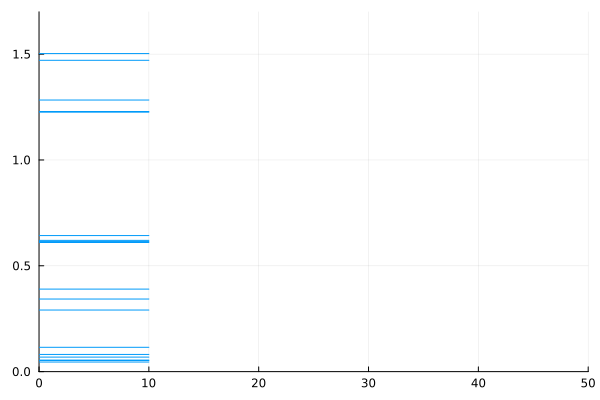

In [62]:
plot(sol1.t[1:length1], sol_mat1[1:length1, 1:31], xlims = (0, 50), ylim = (0, 1.7), label = "", color = 1)

In [63]:
flux_mat1 = zeros((size(sol_mat1)[1], 48))
for i in 1:size(sol_mat1)[1]
  u = copy(sol_mat1[i,:])
  f1 = [1, u[1]*u[2], u[3], u[3], u[4], u[4]*u[5], u[6], u[6], u[7]*u[8], u[9],
       u[9], u[10]*u[11], u[12], u[12], u[13]*u[14], u[15], u[15], u[16]*u[14], u[17], u[17],
       u[18], u[19], u[19], u[20], u[20], u[19], u[20], u[21], u[20], u[20],
       u[23], u[22], u[24], u[23], u[23], u[25], u[24], u[26], u[25], u[26],
       u[27], u[18], u[27], u[28], u[28], u[29], u[30], u[31]]
  r1 = p1 .* f1
  flux_mat1[i,:] = r1
end

10.0

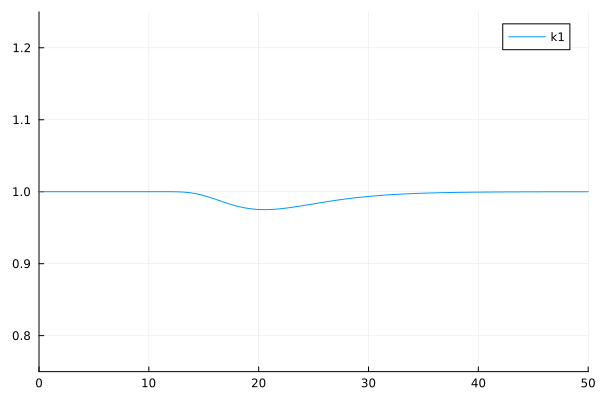

In [64]:
p2 = copy(p1)
u02 = sol_mat1[length1,:]
u02[2] = u02[2]-10
tspan2 = (10.0, 50.0)
print(sol1.t[length1])

prob2 = ODEProblem(pyrimidine_full,u02,tspan2,p2)
sol2 = solve(prob2, Vern9())
sol_mat2 = reduce(hcat,sol2.u)'

length2 = size(sol_mat2)[1]
flux_mat2 = zeros((size(sol_mat2)[1], 48))
for i in 1:size(sol_mat2)[1]
  u = copy(sol_mat2[i,:])
  f2 = [1, u[1]*u[2], u[3], u[3], u[4], u[4]*u[5], u[6], u[6], u[7]*u[8], u[9],
       u[9], u[10]*u[11], u[12], u[12], u[13]*u[14], u[15], u[15], u[16]*u[14], u[17], u[17],
       u[18], u[19], u[19], u[20], u[20], u[19], u[20], u[21], u[20], u[20],
       u[23], u[22], u[24], u[23], u[23], u[25], u[24], u[26], u[25], u[26],
       u[27], u[18], u[27], u[28], u[28], u[29], u[30], u[31]]
  r2 = p2 .* f2
  flux_mat2[i,:] = r2
end




norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]

end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))


for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]

end

plot(sol1.t[1:length1], norm_flux_mat1[1:length1,28:28], xlims = (0, 50), ylim = (0.75, 1.25), label = "", color = 1)
plot!(sol2.t[1:length2], norm_flux_mat2[1:length2,28:28], label = "k1", color = 1)

10.0

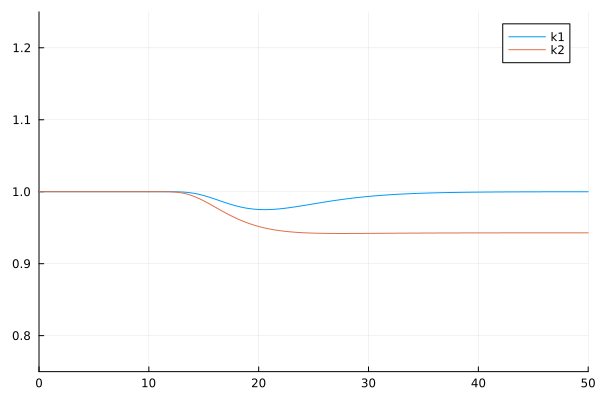

In [65]:
p2 = copy(p1)
u02 = sol_mat1[length1,:]
u02[5] = u02[5]-10
tspan2 = (10.0, 50.0)
print(sol1.t[length1])

prob2 = ODEProblem(pyrimidine_full,u02,tspan2,p2)
sol2 = solve(prob2, Vern9())
sol_mat2 = reduce(hcat,sol2.u)'

length2 = size(sol_mat2)[1]
flux_mat2 = zeros((size(sol_mat2)[1], 48))
for i in 1:size(sol_mat2)[1]
  u = copy(sol_mat2[i,:])
  f2 = [1, u[1]*u[2], u[3], u[3], u[4], u[4]*u[5], u[6], u[6], u[7]*u[8], u[9],
       u[9], u[10]*u[11], u[12], u[12], u[13]*u[14], u[15], u[15], u[16]*u[14], u[17], u[17],
       u[18], u[19], u[19], u[20], u[20], u[19], u[20], u[21], u[20], u[20],
       u[23], u[22], u[24], u[23], u[23], u[25], u[24], u[26], u[25], u[26],
       u[27], u[18], u[27], u[28], u[28], u[29], u[30], u[31]]
  r2 = p2 .* f2
  flux_mat2[i,:] = r2
end




norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]

end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))


for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]

end

plot!(sol1.t[1:length1], norm_flux_mat1[1:length1,28:28], xlims = (0, 50), ylim = (0.75, 1.25), label = "", color = 2)
plot!(sol2.t[1:length2], norm_flux_mat2[1:length2,28:28], label = "k2", color = 2)

10.0

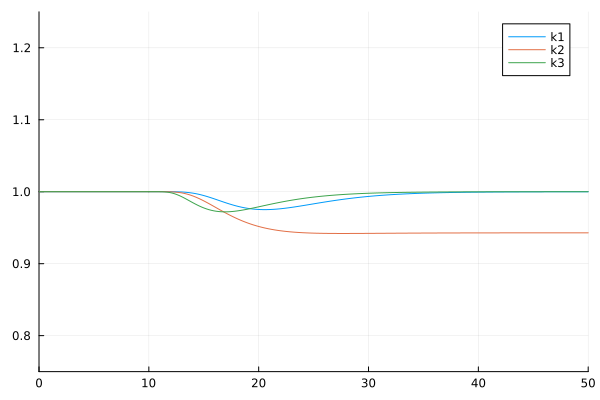

In [66]:
p2 = copy(p1)
u02 = sol_mat1[length1,:]
u02[8] = u02[8]-10
tspan2 = (10.0, 50.0)
print(sol1.t[length1])

prob2 = ODEProblem(pyrimidine_full,u02,tspan2,p2)
sol2 = solve(prob2, Vern9())
sol_mat2 = reduce(hcat,sol2.u)'

length2 = size(sol_mat2)[1]
flux_mat2 = zeros((size(sol_mat2)[1], 48))
for i in 1:size(sol_mat2)[1]
  u = copy(sol_mat2[i,:])
  f2 = [1, u[1]*u[2], u[3], u[3], u[4], u[4]*u[5], u[6], u[6], u[7]*u[8], u[9],
       u[9], u[10]*u[11], u[12], u[12], u[13]*u[14], u[15], u[15], u[16]*u[14], u[17], u[17],
       u[18], u[19], u[19], u[20], u[20], u[19], u[20], u[21], u[20], u[20],
       u[23], u[22], u[24], u[23], u[23], u[25], u[24], u[26], u[25], u[26],
       u[27], u[18], u[27], u[28], u[28], u[29], u[30], u[31]]
  r2 = p2 .* f2
  flux_mat2[i,:] = r2
end




norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]

end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))


for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]

end

plot!(sol1.t[1:length1], norm_flux_mat1[1:length1,28:28], xlims = (0, 50), ylim = (0.75, 1.25), label = "", color = 3)
plot!(sol2.t[1:length2], norm_flux_mat2[1:length2,28:28], label = "k3", color = 3)

10.0

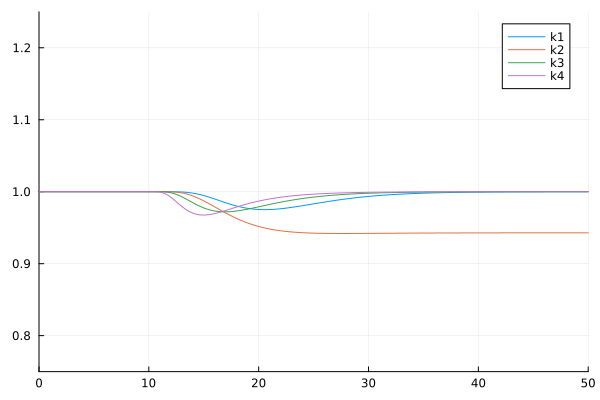

In [67]:
p2 = copy(p1)
u02 = sol_mat1[length1,:]
u02[11] = u02[11]-10
tspan2 = (10.0, 50.0)
print(sol1.t[length1])

prob2 = ODEProblem(pyrimidine_full,u02,tspan2,p2)
sol2 = solve(prob2, Vern9())
sol_mat2 = reduce(hcat,sol2.u)'

length2 = size(sol_mat2)[1]
flux_mat2 = zeros((size(sol_mat2)[1], 48))
for i in 1:size(sol_mat2)[1]
  u = copy(sol_mat2[i,:])
  f2 = [1, u[1]*u[2], u[3], u[3], u[4], u[4]*u[5], u[6], u[6], u[7]*u[8], u[9],
       u[9], u[10]*u[11], u[12], u[12], u[13]*u[14], u[15], u[15], u[16]*u[14], u[17], u[17],
       u[18], u[19], u[19], u[20], u[20], u[19], u[20], u[21], u[20], u[20],
       u[23], u[22], u[24], u[23], u[23], u[25], u[24], u[26], u[25], u[26],
       u[27], u[18], u[27], u[28], u[28], u[29], u[30], u[31]]
  r2 = p2 .* f2
  flux_mat2[i,:] = r2
end




norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]

end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))


for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]

end

plot!(sol1.t[1:length1], norm_flux_mat1[1:length1,28:28], xlims = (0, 50), ylim = (0.75, 1.25), label = "", color = 4)
plot!(sol2.t[1:length2], norm_flux_mat2[1:length2,28:28], label = "k4", color = 4)

10.0

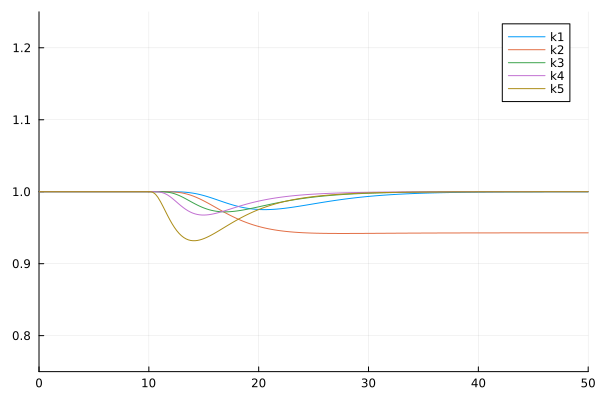

In [68]:
p2 = copy(p1)
u02 = sol_mat1[length1,:]
u02[14] = u02[14]-10
tspan2 = (10.0, 50.0)
print(sol1.t[length1])

prob2 = ODEProblem(pyrimidine_full,u02,tspan2,p2)
sol2 = solve(prob2, Vern9())
sol_mat2 = reduce(hcat,sol2.u)'

length2 = size(sol_mat2)[1]
flux_mat2 = zeros((size(sol_mat2)[1], 48))
for i in 1:size(sol_mat2)[1]
  u = copy(sol_mat2[i,:])
  f2 = [1, u[1]*u[2], u[3], u[3], u[4], u[4]*u[5], u[6], u[6], u[7]*u[8], u[9],
       u[9], u[10]*u[11], u[12], u[12], u[13]*u[14], u[15], u[15], u[16]*u[14], u[17], u[17],
       u[18], u[19], u[19], u[20], u[20], u[19], u[20], u[21], u[20], u[20],
       u[23], u[22], u[24], u[23], u[23], u[25], u[24], u[26], u[25], u[26],
       u[27], u[18], u[27], u[28], u[28], u[29], u[30], u[31]]
  r2 = p2 .* f2
  flux_mat2[i,:] = r2
end




norm_flux_mat1 = zeros(size(flux_mat1))
norm_flux_mat2 = zeros(size(flux_mat2))


for j in 1:size(flux_mat1)[2]
  norm_flux_mat1[:,j] = flux_mat1[:,j] / flux_mat1[end,j]
  norm_flux_mat2[:,j] = flux_mat2[:,j] / flux_mat1[end,j]

end

norm_sol_mat1 = zeros(size(sol_mat1))
norm_sol_mat2 = zeros(size(sol_mat2))


for j in 1:size(sol_mat1)[2]
  norm_sol_mat1[:,j] = sol_mat1[:,j] / sol_mat1[end,j]
  norm_sol_mat2[:,j] = sol_mat2[:,j] / sol_mat1[end,j]

end

plot!(sol1.t[1:length1], norm_flux_mat1[1:length1,28:28], xlims = (0, 50), ylim = (0.75, 1.25), label = "", color = 5)
plot!(sol2.t[1:length2], norm_flux_mat2[1:length2,28:28], label = "k5", color = 5)

In [69]:
savefig("Flux_Pyrimidine_UDPGlucose.svg")

"C:\\Users\\tjrgh\\OneDrive\\Desktop\\연구\\Nonexponential\\Flux_Pyrimidine_UDPGlucose.svg"